### Part 1 - Import de todas as bibliotecas necessárias 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Part 2 - Leitura do local dataframe + infos básicas

In [2]:
df = pd.read_csv('cleaned.csv')

In [3]:
df.isnull().sum()   #verificar quantas colunas têm valores nulos

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

### Part 4 - Análise e substituição de valores nulos

Nesta parte, substituímos os valores escritos "na" por um valor verdadeirmente nulo, "NaN"

Aqui percebemos a proporção de cada valor em cada coluna, incluindo os valores nulos

In [4]:
percentage_values = {}
for column in df.columns:
    counts = df[column].value_counts(normalize=True, dropna=False) * 100
    percentage_values[column] = counts

for column, percentages in percentage_values.items():
    print(percentages)
    print()

Age_band_of_driver
18-30       34.678467
31-50       33.184475
Over 51     12.869438
Unknown     12.569016
Under 18     6.698603
Name: proportion, dtype: float64

Sex_of_driver
Male       92.862943
Female      5.691783
Unknown     1.445274
Name: proportion, dtype: float64

Educational_level
Junior high school    61.862618
Elementary school     17.562520
High school            9.012666
Unknown                6.828516
Above high school      2.939266
Writing & reading      1.429035
Illiterate             0.365378
Name: proportion, dtype: float64

Vehicle_driver_relation
Employee    78.166613
Owner       16.019812
Unknown      4.814875
Other        0.998701
Name: proportion, dtype: float64

Driving_experience
5-10yr        27.305943
2-5yr         21.216304
Above 10yr    18.366353
1-2yr         14.257876
Below 1yr     10.896395
Unknown        6.731082
No Licence     0.958103
unknown        0.267944
Name: proportion, dtype: float64

Lanes_or_Medians
Two-way (divided with broken lines road ma

### Part 5 - Fazer matriz de correlação e importância de variáveis

Primeiramente, vamos analisar a matriz de correlação entre as várias variáveis

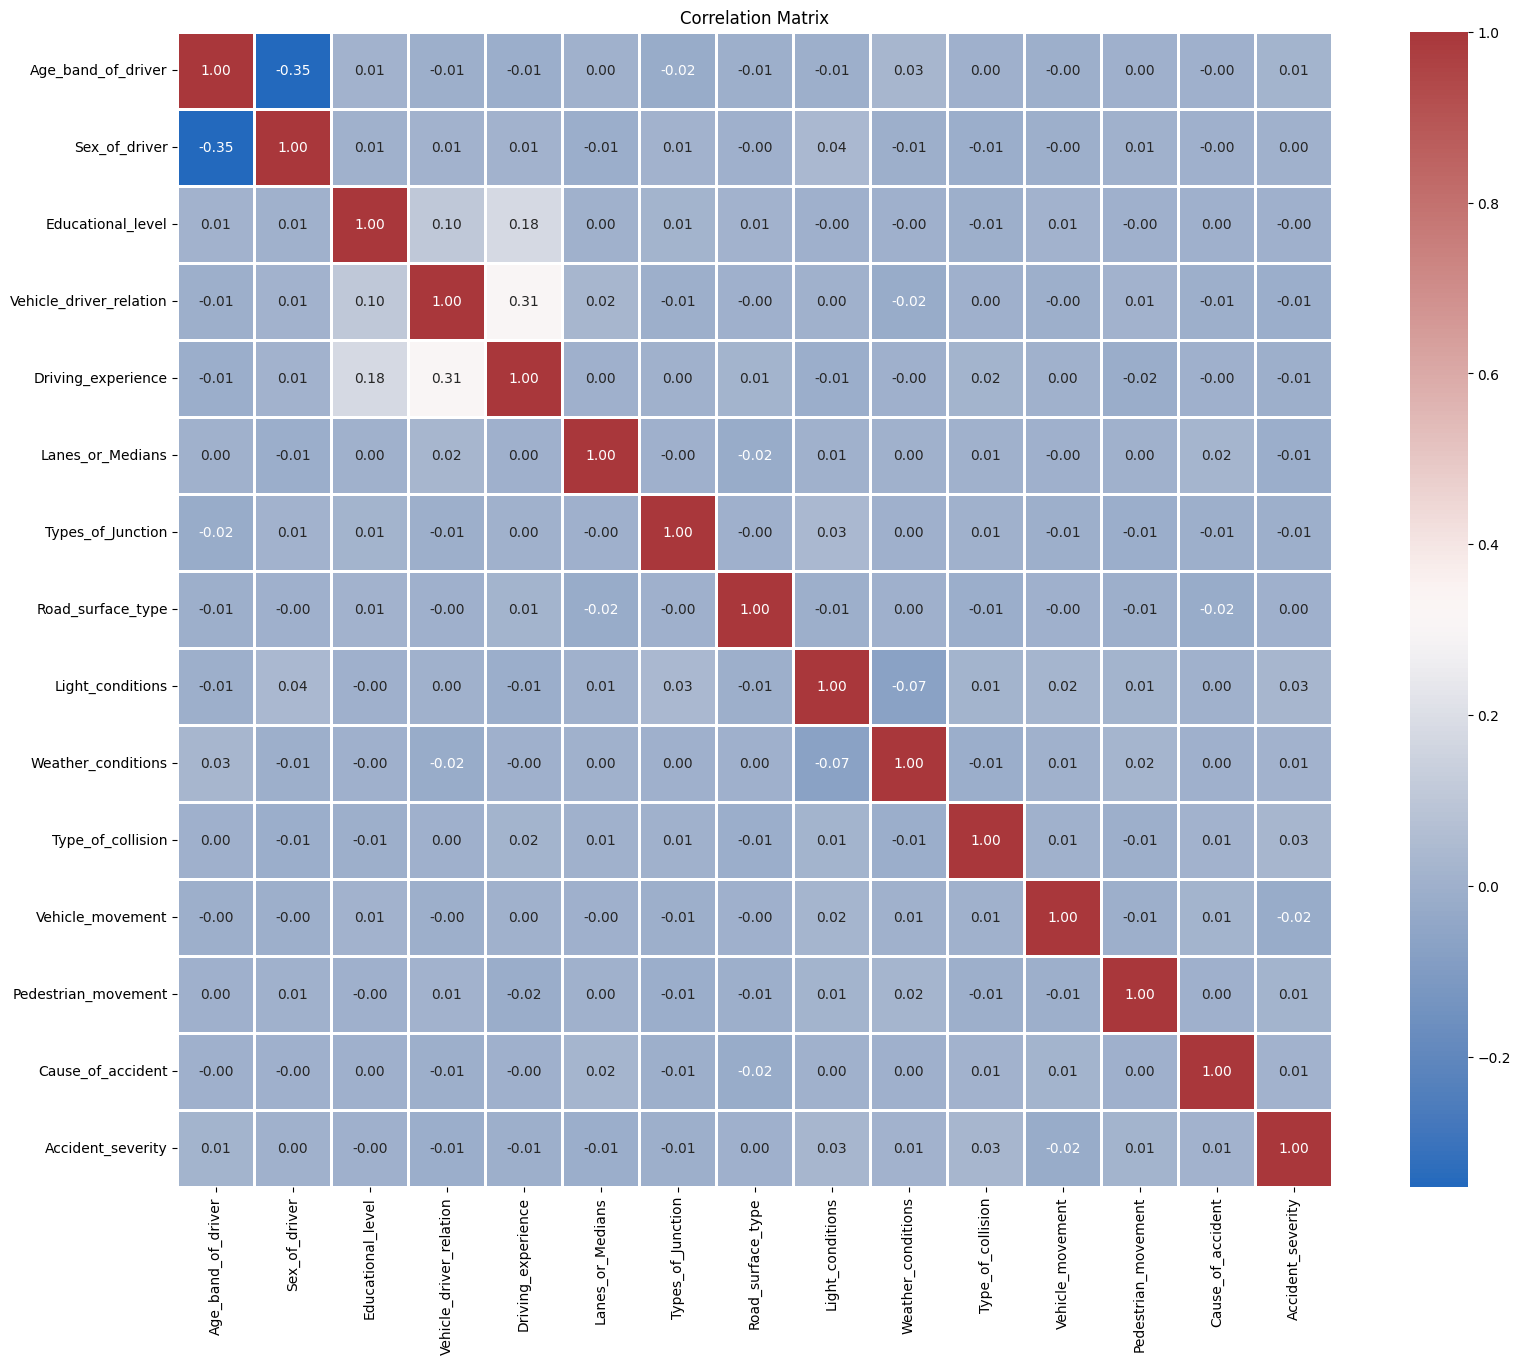

In [5]:
label_encoder = LabelEncoder()  # aplicar Label Encoder a todas as colunas "object"
for column in df.select_dtypes(include = 'object').columns:
    df[column] = label_encoder.fit_transform(df[column])

correlation_matrix = df.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(correlation_matrix, annot = True, cmap = 'vlag', fmt = ".2f", linewidths = 1, square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df

In [ ]:
df_2 = df[['Gravidade da Vítima', 'Gravidade do Acidente']]
correlation_matrix = df_2.corr()
plt.figure(figsize = (10, 5))
sns.heatmap(correlation_matrix, annot = True, cmap = 'vlag', fmt = ".4f", linewidths = 1, square=True)
plt.title('Correlation Matrix')
plt.show()

In [13]:
contingency_table = pd.crosstab(df['Gravidade do Acidente'], df['Gravidade da Vítima'], normalize='index') * 100

# Display the proportions
print(contingency_table)

Gravidade da Vítima           1         2          3
Gravidade do Acidente                               
Fatal injury           0.000000  9.090909  90.909091
Serious Injury         0.265722  8.680248  91.054030
Slight Injury          0.346699  9.993970  89.659331


De seguida, analisamos a importância de cada feature para o modelo 

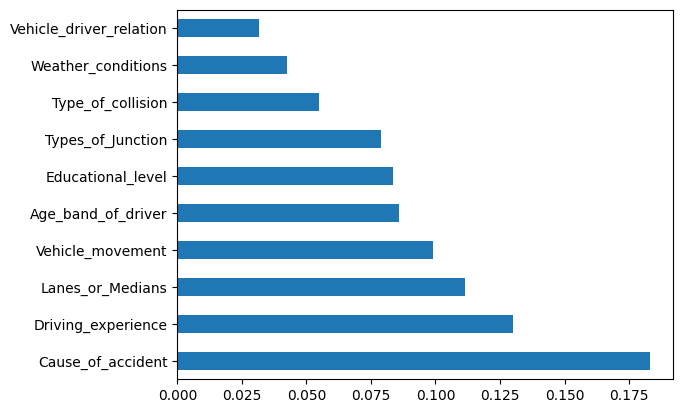

In [6]:
X = df.iloc[:, :-1].values # todas as features
Y =  df.iloc[:, -1].values # feature target

modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

feature_importances = pd.Series(modelo.feature_importances_, index = df.columns[:-1])
feature_importances.nlargest(10).plot(kind='barh')  # mostrar as 10 features mais importantes

plt.show()

Neste ponto, dividimos os dados em sets de treino e de teste, utilizando 25% dos dados para teste e os restantes para teino

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 30)

print("Número de exemplos nos dados de treino: ", X_train.shape[0])
print("Número de exemplos nos dados de teste: ", X_test.shape[0])

### Parte 6 - Árvores de Decisão

O primeiro modelo de machine learning utilizado foi o modelo de árvores de decisão.


Primeiro vamos estanderizar as nossas features. Isso é feito para garantir que todas as características tenham a mesma escala, o que pode melhorar o desempenho do algoritmo. 

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# O parâmetro max_depth = 4 define a profundidade máxima da árvore de decisão, 
# visto que limitar a profundidade pode ajudar a evitar overfitting, tornando a árvore mais simples.
clf = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)

# Treino: Arvore de Decisão
clf = clf.fit(X_train, y_train)

# Previsão da resposta --> Teste
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# Print dos valores accuracy
print('Train data accuracy: ', accuracy_score(y_true = y_train, y_pred = y_train_pred))
print('Test data accuracy: ', accuracy_score(y_true = y_test, y_pred = y_test_pred))
print('Decision tree accuracy: ', accuracy_score(y_test_pred, y_test))



In [ ]:
plt.figure(figsize = (20, 10))
tree.plot_tree(clf, fontsize = 8, feature_names = df.columns[:-1], filled = True, rounded = True, proportion=True)
plt.show()

Através do classification report, podemos concluir a acurácia do modelo tal como o recall, a precisão e o f1-score.

In [ ]:
print(classification_report(y_test, y_test_pred, zero_division = 1))

Após realizar um classification report, vamos agora mostrar a matriz de confusão. Assim podemos ver a quantidade de falsos positivos e falsos negativos.

In [ ]:
cf_matrix = confusion_matrix(y_test, y_test_pred)

ax = sns.heatmap(cf_matrix, annot = True, cmap = 'seismic', fmt = "4.0f")
ax.set_title('Seaborn Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted decision case disposition')
ax.set_ylabel('Actual decision case disposition ')

print(cf_matrix)

plt.show()